In [1]:
%matplotlib inline

import json
import operator

from collections import namedtuple, Counter, OrderedDict

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
with open('./data/sfpd.json') as fin:
    data = json.load(fin)
columns = [obj['name'] for obj in data['meta']['view']['columns']]
Incident = namedtuple('Incident', columns)
incidents = [Incident(*row) for row in data['data']]    

In [3]:
def dhist(d):
    """Plots a dict object in a bar graph to match the histogram layout.
    """
    # For a bar graph, the first argument is the values at which the 
    # bars will be place. We set the width to 1 (default is 0.8) to 
    # remove any whitespace between bars and make it look more like the 
    # histogram. We set the align to 'edge' (default is 'center') to make
    # sure that the left edge of the bar is aligned with its value.
    plt.bar(range(len(d)), d.values(), width=1, align='edge')
    # Since the bars' left edges are aligned with their values, we have to 
    # move the x-tick labels in a bit to make them centered within the bar.
    # Since the bars are all a width of 1, we simply need to add 0.5 to the
    # left values of every tick. Finally, we rotate the labels 90 degrees 
    # so they are readable.
    plt.xticks([i + 0.5 for i in range(len(d))], d.keys(), rotation=90)
    # Making the graph as tight as possible by limiting the X-axis values.
    plt.xlim([0, len(d)]);

## Where do Crimes Happen?

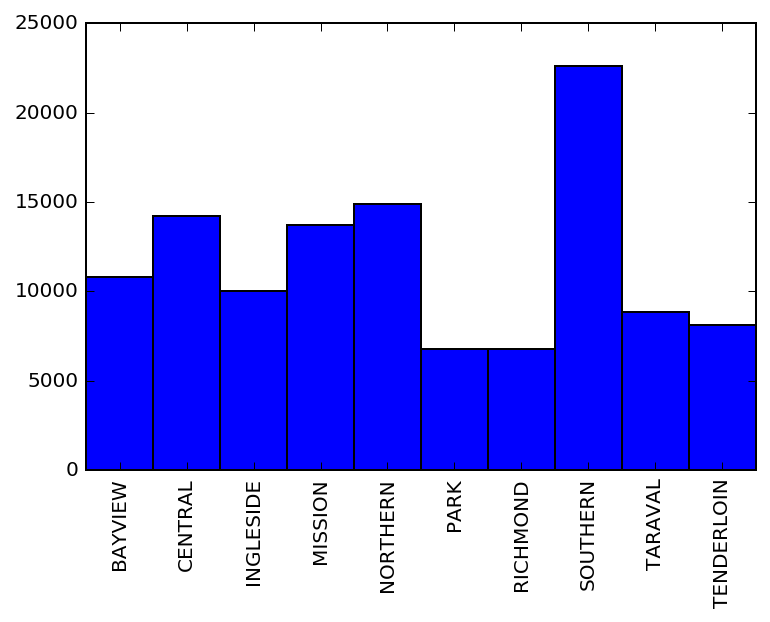

In [4]:
hist = Counter(i.PdDistrict for i in incidents)
hist = OrderedDict(sorted(hist.items(), key=operator.itemgetter(0)))
dhist(hist)

In [5]:
set(i.Category for i in incidents)

{u'ARSON',
 u'ASSAULT',
 u'BAD CHECKS',
 u'BRIBERY',
 u'BURGLARY',
 u'DISORDERLY CONDUCT',
 u'DRIVING UNDER THE INFLUENCE',
 u'DRUG/NARCOTIC',
 u'DRUNKENNESS',
 u'EMBEZZLEMENT',
 u'EXTORTION',
 u'FAMILY OFFENSES',
 u'FORGERY/COUNTERFEITING',
 u'FRAUD',
 u'GAMBLING',
 u'KIDNAPPING',
 u'LARCENY/THEFT',
 u'LIQUOR LAWS',
 u'LOITERING',
 u'MISSING PERSON',
 u'NON-CRIMINAL',
 u'OTHER OFFENSES',
 u'PORNOGRAPHY/OBSCENE MAT',
 u'PROSTITUTION',
 u'ROBBERY',
 u'RUNAWAY',
 u'SECONDARY CODES',
 u'SEX OFFENSES, FORCIBLE',
 u'SEX OFFENSES, NON FORCIBLE',
 u'STOLEN PROPERTY',
 u'SUICIDE',
 u'SUSPICIOUS OCC',
 u'TREA',
 u'TRESPASS',
 u'VANDALISM',
 u'VEHICLE THEFT',
 u'WARRANTS',
 u'WEAPON LAWS'}

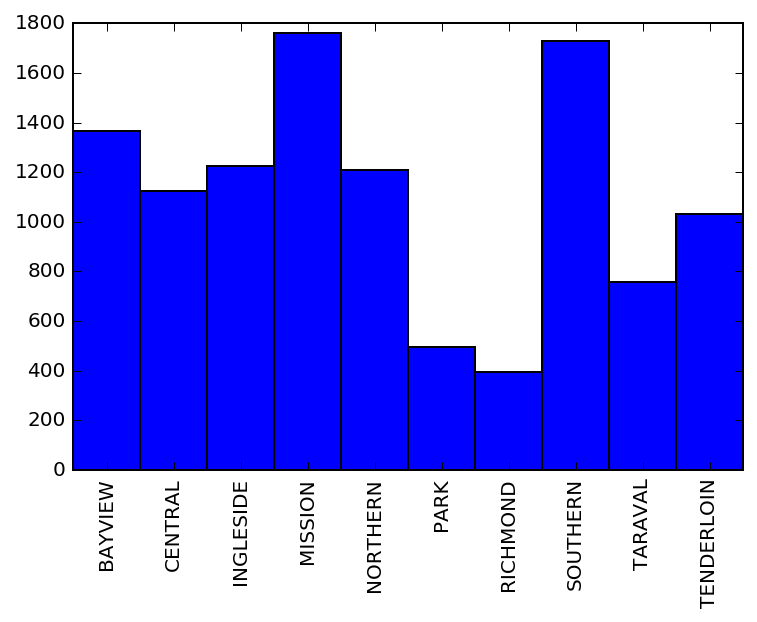

In [6]:
violent_crimes = ['ARSON', 'ASSAULT','KIDNAPPING', 'SEX OFFENSES, FORCIBLE']
assaults = [i for i in incidents if i.Category in violent_crimes]
hist = Counter(i.PdDistrict for i in assaults)
hist = OrderedDict(sorted(hist.items(), key=operator.itemgetter(0)))
dhist(hist)

## What Types of Crime?

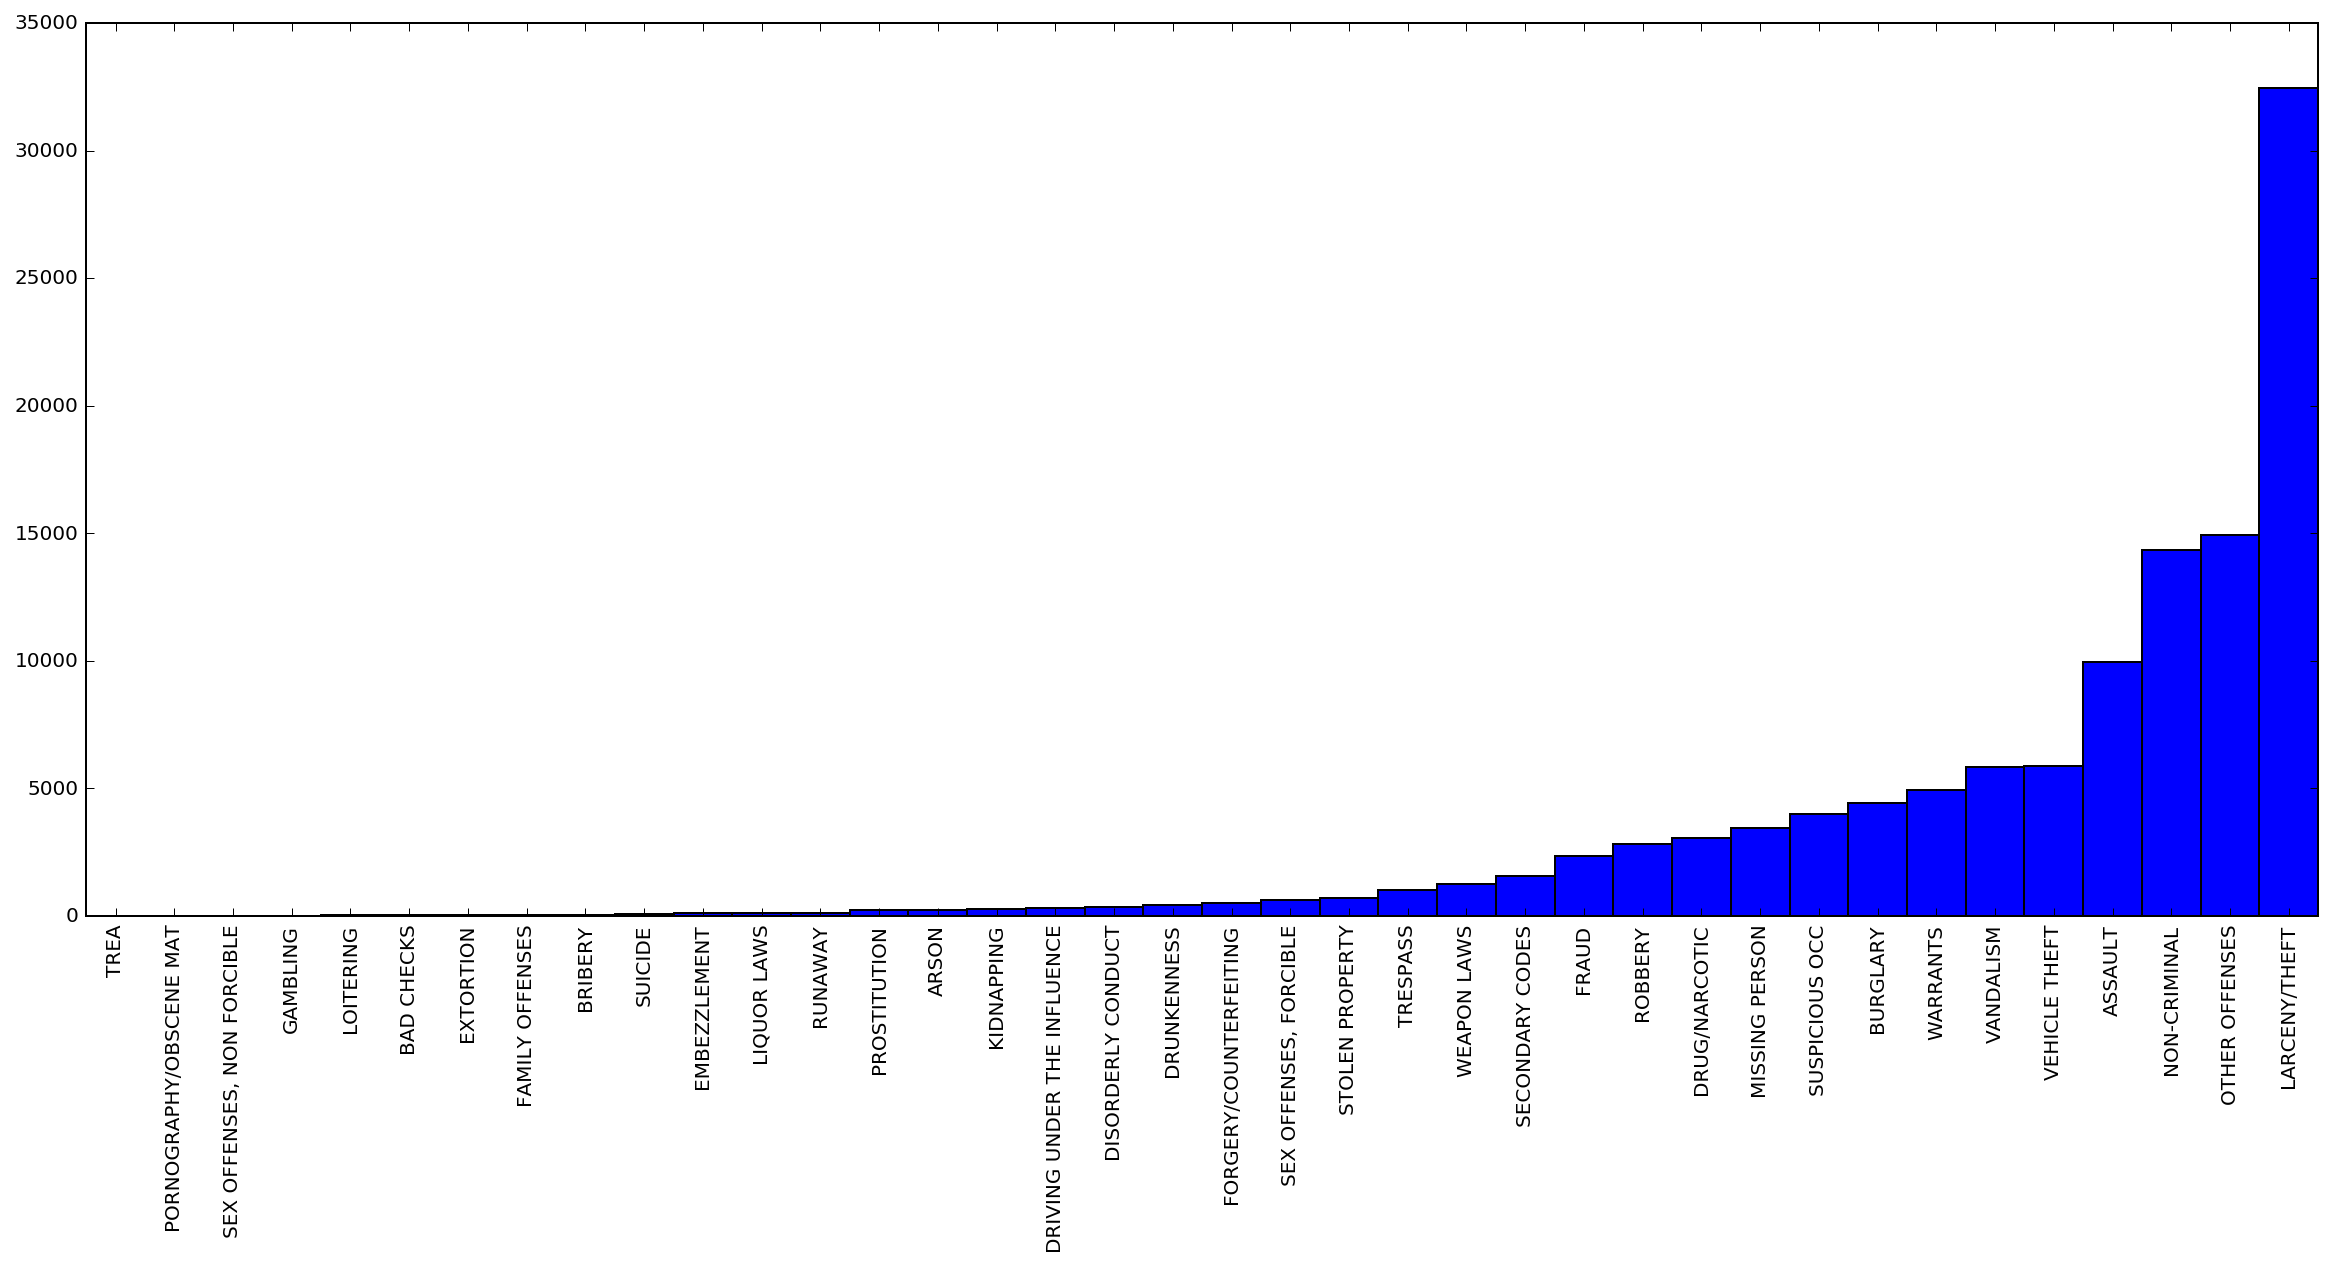

In [7]:
hist = Counter(i.Category for i in incidents)
hist = OrderedDict(sorted(hist.items(), key=operator.itemgetter(1)))
plt.figure(figsize=(20, 8))
dhist(hist)

## When do Crimes Occur?

Let's take a look at crime on each day of the week. It looks like crime overall is roughly the same on a daily basis with a slight bump on Friday and Saturday (which you would imagine to be true). But, what happens if we look at just violent crime? Now we see a little more "flavor" in the distribution of crime. It seems to be at its lowest on Wednesday, and it slowly builds up to it peak on Sunday, and then comes down again by Wednesday. 

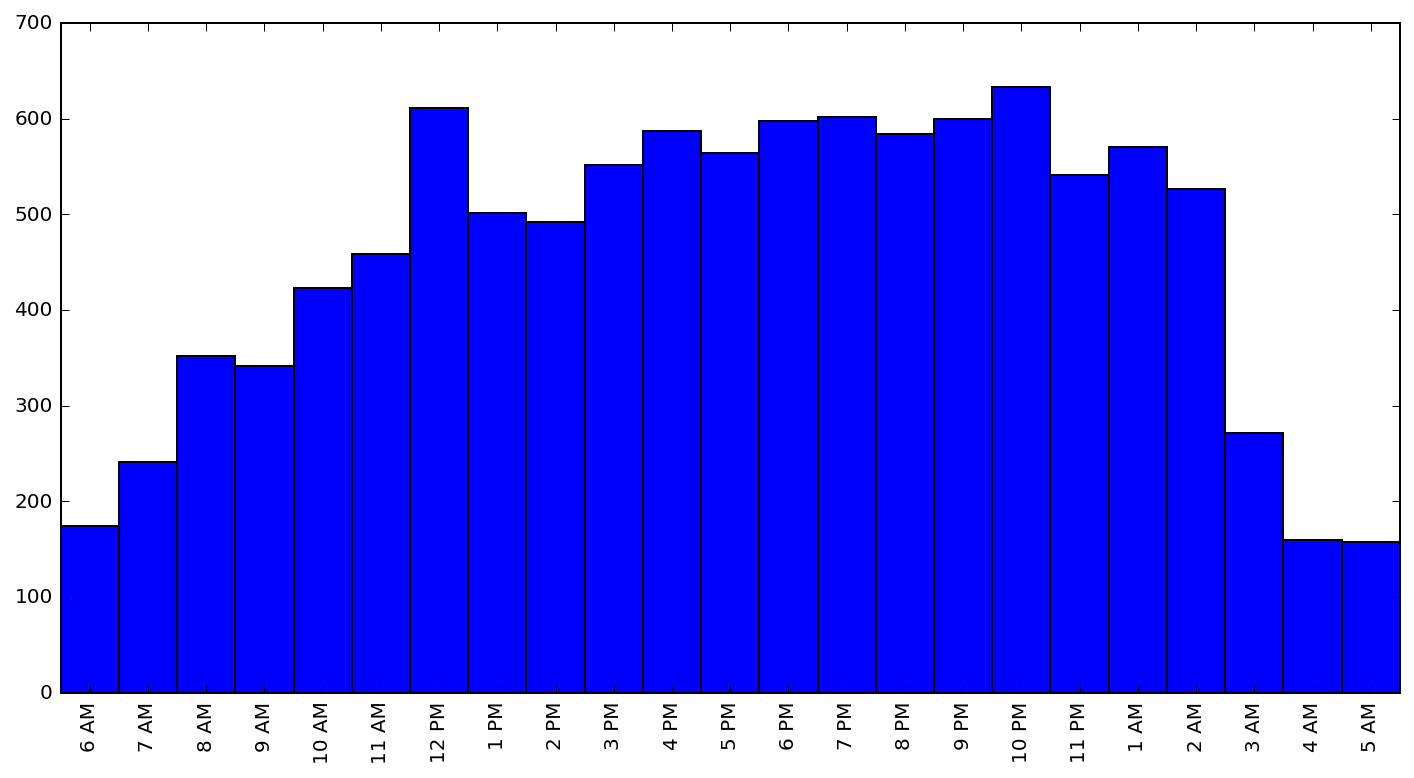

In [8]:
violent_crimes = ['ARSON', 'ASSAULT','KIDNAPPING', 'SEX OFFENSES, FORCIBLE']
hist = Counter(int(i.Time[:2]) for i in incidents if i.Category in violent_crimes)
morning = range(6, 12)
daytime = [12] + range(1, 13)
late_night = range(1, 6)
keys = ['%s AM' % h for h in morning] + \
       ['%s PM' % h for h in daytime] + \
       ['%s AM' % h for h in late_night]
values = [hist[k] for k in range(6, 24) + range(0, 6)]
hist = OrderedDict(zip(keys, values))
plt.figure(figsize=(12, 6))
dhist(hist)

Let's look at the number of total crimes per day and the number of violent crimes per day side by side. 

If you notice, there is an order of magnitude difference between the two which is normally not a good thing to have when making a comparison, but since we're only interested in the shape of the distribution, that shouldn't be a problem for us. 

The other change we made in this example, is we adjusted the range of values that we display on the y-axes. The reason for this again is that we are just interested in the shape of the distribution so we can see what days have the most crime. Overall, there isn't a huge difference in crime per day, and that is kind of disguised here by the adjustment we made in the axes.

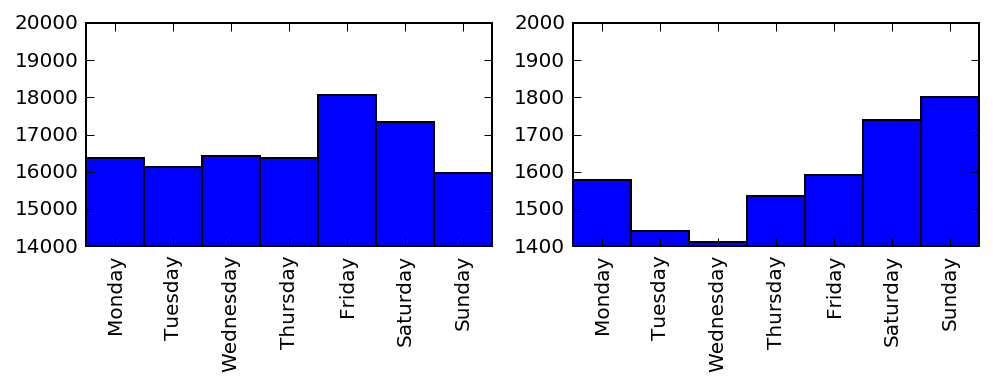

In [9]:
keys = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(8, 2))

fig.add_subplot(1, 2, 1)
# Adjust the y limits for the current axes.
plt.ylim([14000, 20000])
hist = Counter(i.DayOfWeek for i in incidents)
values = [hist[k] for k in keys]
dhist(OrderedDict(zip(keys, values)))

fig.add_subplot(1, 2, 2)
plt.ylim([1400, 2000])
hist = Counter(i.DayOfWeek for i in incidents if i.Category in violent_crimes)
values = [hist[k] for k in keys]
dhist(OrderedDict(zip(keys, values)))
